In [ ]:
# Generative AI :- Using Cartoon dataset 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
def load_images_from_folder(folder_path, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=img_size, color_mode="rgb")  # Ensure images are RGB
        img_array = img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
    return np.array(images)

In [3]:
# Load dataset from folder
data_folder = "I:/GenAI/cartoonset10k"  
x_train = load_images_from_folder(data_folder)
x_test = x_train[:10]  # Using part of training set as test set

# Ensure the input shape is correct
if x_train.shape[-1] != 3:
    raise ValueError("Input images must have 3 channels (RGB), but found shape: " + str(x_train.shape))

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class ConvAutoencoder(Model):
    def __init__(self, input_shape=(64, 64, 3), latent_dim=128):
        super(ConvAutoencoder, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=input_shape),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.BatchNormalization(),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.Input(shape=(latent_dim,)),
            layers.Dense(8 * 8 * 128, activation='relu'),
            layers.Reshape((8, 8, 128)),
            layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=2),
            layers.BatchNormalization(),
            layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.BatchNormalization(),
            layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.BatchNormalization(),
            layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output layer
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model
input_shape = (64, 64, 3)
latent_dim = 128
autoencoder = ConvAutoencoder(input_shape, latent_dim)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 281ms/step - loss: 0.0490 - val_loss: 0.0145
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 265ms/step - loss: 0.0101 - val_loss: 0.0069
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 240ms/step - loss: 0.0065 - val_loss: 0.0054
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - loss: 0.0027 - val_loss: 0.0025


In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

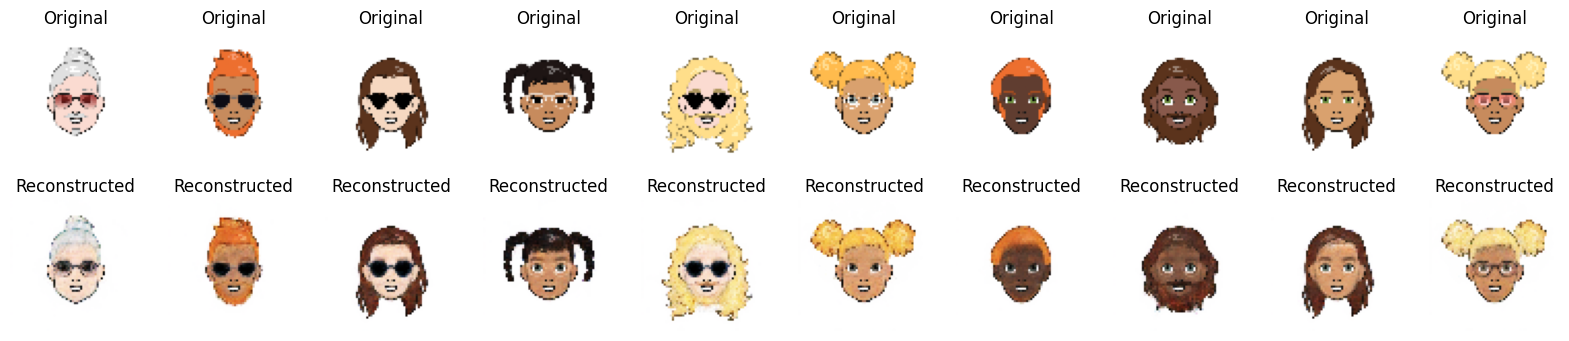

In [16]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")

# Move plt.show() outside the loop
plt.show()
